In [1]:
import os
os.sys.path.append(os.path.dirname(os.path.abspath('.')))

## 数据准备

In [2]:
import numpy as np
from datasets.dataset import load_wine

In [3]:
data=load_wine()
X=data.data
Y=data.target

from preprocessing.StandardScaler import StandardScaler

X=StandardScaler().fit_transform(X)

## 模型基本
首先了解一下协方差矩阵$\Sigma$。对于一维数据，我们常用的统计量为**均值**与**方差**；而在多维数据情况下，通常需要分析不同纬度变量之间的关系，由此衍生出协方差矩阵：
$$
\Sigma=
 \left[
 \begin{matrix}
   var(x_{1},x_{1}) & \cdots & var(x_{m},x_{1}) \\
   \vdots & \ddots & \vdots \\
   var(x_{m},x_{1}) & \cdots & var(x_{m},x_{m})
  \end{matrix}
  \right]
$$
协方差矩阵有一个重要的性质可用于PCA：协方差矩阵最大特征值对应的特征向量总是指向数据最大方差的方向；且第二大特征值对应的特征向量正交于第一特征向量，以此类推。设存在向量$\vec{v}$与标量$\lambda$满足：
$$
\Sigma\vec{v}=\lambda\vec{v}
$$
则$\lambda$与$\vec{v}$分别为$\Sigma$的特征值于特征向量。

In [4]:
covar=np.cov(X.T)    # 计算特征间的协方差矩阵，需要先转置

eigval,eigvec=np.linalg.eig(covar)    # 注意特征向量是以列形式返回的
top_idx=np.argsort(eigval)[::-1]    # 特征值的排序索引

top_vec=eigvec[:,top_idx[:2]]    # 取前两个特征向量

X_trans=X.dot(top_vec)    # 与多少个特征向量相乘即压缩到多少维

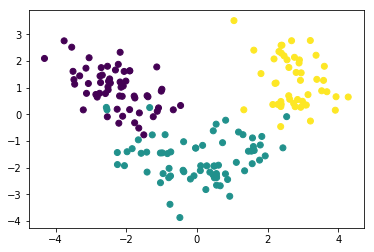

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X_trans[:,0],X_trans[:,1],c=Y)
plt.show()